In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
from scipy.signal import hilbert
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd

## Carga de datos.

In [34]:
# Carga de datos.
eeg_young = np.load("./data/data/dataset_Younger.npy")
eeg_old = np.load("./data/data/dataset_Older.npy")

In [35]:
print(eeg_young.shape)
print(eeg_old.shape)

(8, 2480, 65)
(8, 620, 65)


In [36]:
muestra = eeg_young[0,:,:]
muestra.shape

(2480, 65)

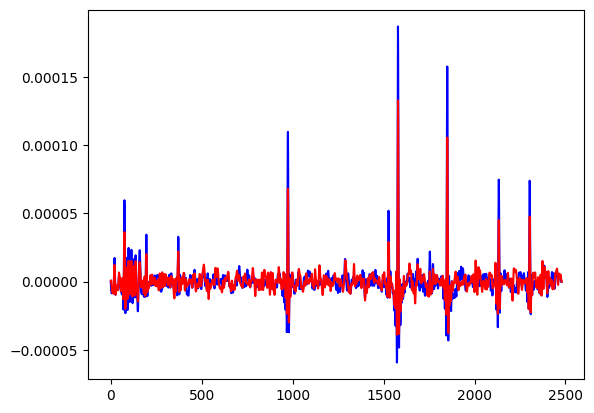

In [37]:
plt.plot(range(muestra.shape[0]), muestra[:,0], color = 'blue')
plt.plot(range(muestra.shape[0]), muestra[:,1], color = 'red')
plt.show()

In [49]:
muestra1 = muestra[:,0]
muestra1.shape

(2480,)

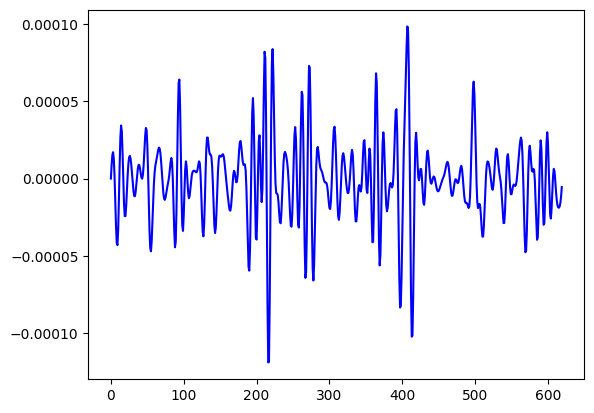

In [39]:
muestra_adulto = eeg_old[0,:,:]
muestra_adulto1 = muestra_adulto[:,0]
plt.plot(range(muestra_adulto1.shape[0]), muestra_adulto1, color = 'blue')
plt.show()

In [ ]:
# Parámetros
num_input_neurons = 1      # Dimensionalidad de entrada (1 canal)
num_reservoir_neurons = 150   # Número de neuronas en el reservorio
num_readout_neurons = 1      # Número de neuronas de salida

num_training_samples = muestra1.shape[0] # Número de muestras de entrenamiento

# Generar pesos de entrada al reservorio
input2res = np.random.randn(num_reservoir_neurons, num_input_neurons)

# Generar pesos recurrentes del reservorio
res2res = np.random.randn(num_reservoir_neurons, num_reservoir_neurons)

# Normalizar las columnas de los pesos recurrentes
res2res = res2res / np.linalg.norm(res2res, axis=0)

# Sesgo del reservorio
input_bias = np.random.rand(num_reservoir_neurons, 1)

# Ajustamos la dimensión de muestra1
sec = muestra1.reshape(1, len(muestra1))

# Estados iniciales del reservorio
reservoir_states = np.random.rand(num_reservoir_neurons, num_training_samples + 1);

# Dinámicas del reservorio
for i in range(num_training_samples):
    reservoir_states[:, i + 1] = np.tanh(
        (0.05 * input2res @ sec[:, i]) +
        (0.95 * res2res @ reservoir_states[:, i]) +
        input_bias.flatten()
    )

# Extracción de la envolvente superior usando Hilbert transform
RS = reservoir_states - np.mean(reservoir_states,axis=1, keepdims=True)
analytic_signal = hilbert(RS)
amplitude_envelope = np.abs(analytic_signal)

# Eliminar los primeros 100 puntos para estabilizar el reservorio
stable_start = min(100, amplitude_envelope.shape[0])
input_sequence = amplitude_envelope[:, stable_start:-50]

In [61]:
input_sequence.shape

(150, 2281)

Número de clústeres: 2, Coeficiente Silhouette: 0.7168
Número de clústeres: 3, Coeficiente Silhouette: 0.7011
Número de clústeres: 4, Coeficiente Silhouette: 0.5553
Número de clústeres: 5, Coeficiente Silhouette: 0.6230
Número de clústeres: 6, Coeficiente Silhouette: 0.5307
Número de clústeres: 7, Coeficiente Silhouette: 0.5781
Número de clústeres: 8, Coeficiente Silhouette: 0.5764


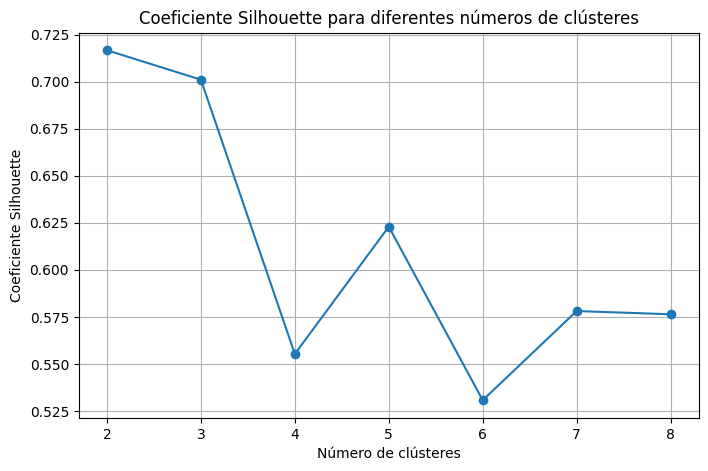

In [62]:
silhouette_scores = []  
clusters_range = range(2, 9)  # Clústeres de 2 a 8  
labels_clusters = []

for num_clusters in clusters_range:  
    kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(input_sequence.T)  
    labels = kmeans.labels_  
    labels_clusters.append(labels)
    silhouette_avg = silhouette_score(input_sequence.T, labels)  
    silhouette_scores.append(silhouette_avg)  
    print(f'Número de clústeres: {num_clusters}, Coeficiente Silhouette: {silhouette_avg:.4f}')  

# Graficar los resultados  
plt.figure(figsize=(8, 5))  
plt.plot(clusters_range, silhouette_scores, marker='o')  
plt.title('Coeficiente Silhouette para diferentes números de clústeres')  
plt.xlabel('Número de clústeres')  
plt.ylabel('Coeficiente Silhouette')  
plt.xticks(clusters_range)  
plt.grid()  
plt.show() 

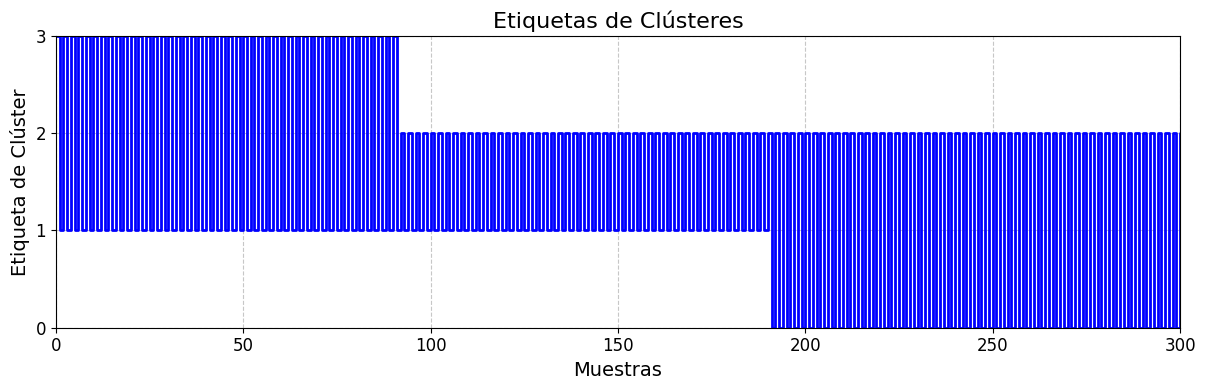

In [64]:
plt.figure(figsize=(12, 4))  
plt.step(range(input_sequence.shape[1]), labels_clusters[2], where='post', color='blue', linewidth=2) 
plt.title('Etiquetas de Clústeres', fontsize=16)
plt.xlabel('Muestras', fontsize=14)  
plt.ylabel('Etiqueta de Clúster', fontsize=14)  
plt.yticks(np.arange(num_clusters))  
plt.xticks(fontsize=12)  
plt.yticks(fontsize=12)  
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout() 
plt.ylim(0,3)
plt.xlim(0,300)
plt.show()

## Ejemplo de juguete.

In [4]:
# Parámetros
num_input_neurons = 64       # Dimensionalidad de entrada (64 canales EEG)
num_reservoir_neurons = 10   # Número de neuronas en el reservorio
num_readout_neurons = 1      # Número de neuronas de salida

# Datos de entrada (ejemplo, reemplazar con los datos reales)
num_training_samples = 5000  # Número de muestras de entrenamiento
input_data = np.random.randn(num_input_neurons, num_training_samples)  # Entrada aleatoria

# Generar pesos de entrada al reservorio
input2res = np.random.randn(num_reservoir_neurons, num_input_neurons)

# Generar pesos recurrentes del reservorio
res2res = np.random.randn(num_reservoir_neurons, num_reservoir_neurons)

# Normalizar las columnas de los pesos recurrentes
res2res = res2res / np.linalg.norm(res2res, axis=0)

# Sesgo del reservorio
input_bias = np.random.rand(num_reservoir_neurons, 1)

# Estados iniciales del reservorio
reservoir_states = np.zeros((num_reservoir_neurons, num_training_samples + 1))

# Dinámicas del reservorio
for i in range(num_training_samples):
    reservoir_states[:, i + 1] = np.tanh(
        (0.05 * input2res @ input_data[:, i]) +
        (0.95 * res2res @ reservoir_states[:, i]) +
        input_bias.flatten()
    )

# Extracción de la envolvente superior usando Hilbert transform
analytic_signal = hilbert(reservoir_states[:, 1:].T, axis=0)
amplitude_envelope = np.abs(analytic_signal)

# Eliminar los primeros 1000 puntos para estabilizar el reservorio
stable_start = min(1000, amplitude_envelope.shape[0])
input_sequence = amplitude_envelope[stable_start:, :].T

# Agrupamiento (clustering)
num_clusters = 4  # Número de clústeres
kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(input_sequence.T)

# Resultados
idx = kmeans.labels_  # Etiquetas de los clústeres
C = kmeans.cluster_centers_  # Centroides de los clústeres

print("Centroides de los clústeres:")
print(C)

Centroides de los clústeres:
[[0.41641548 0.62885201 0.89365422 0.81558836 0.85418441 0.71581863
  0.47124184 0.84385956 0.45632725 0.40928244]
 [0.78498998 0.57896502 0.74115337 0.88434004 0.8332536  0.43338085
  0.45728797 0.84678205 0.76767845 0.4196155 ]
 [0.79265322 0.76189902 0.90089739 0.76247142 0.83650871 0.71567688
  0.68100964 0.7521055  0.49393495 0.68330445]
 [0.44215115 0.52408388 0.73224671 0.88013846 0.76937179 0.47542297
  0.52552208 0.88043324 0.72648667 0.76683066]]


In [7]:
output_signal = kmeans.transform(input_sequence.T)
output_signal.shape

(4000, 4)

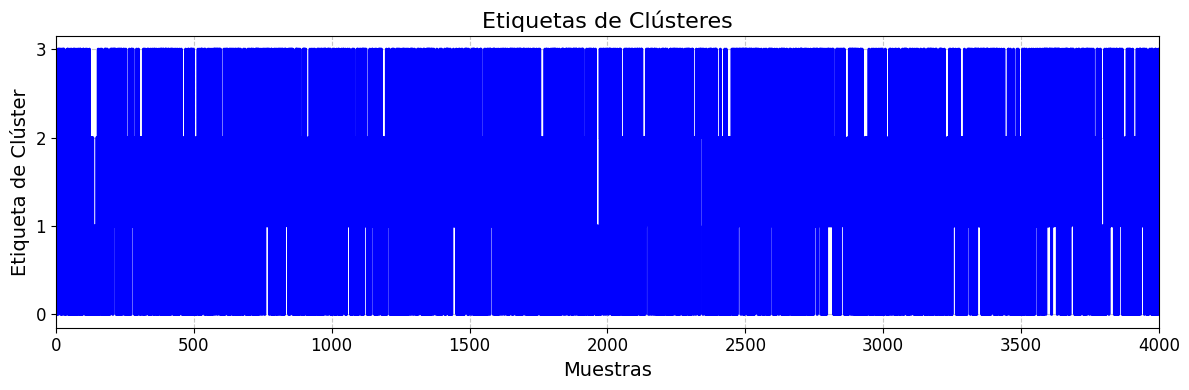

In [38]:
plt.figure(figsize=(12, 4))  
plt.step(range(input_sequence.shape[1]), idx, where='post', color='blue', linewidth=2) 
plt.title('Etiquetas de Clústeres', fontsize=16)
plt.xlabel('Muestras', fontsize=14)  
plt.ylabel('Etiqueta de Clúster', fontsize=14)  
plt.yticks(np.arange(num_clusters))  
plt.xticks(fontsize=12)  
plt.yticks(fontsize=12)  
plt.grid(True, linestyle='--', alpha=0.7)
plt.xlim(0, input_sequence.shape[1])  
plt.tight_layout() 
plt.show()

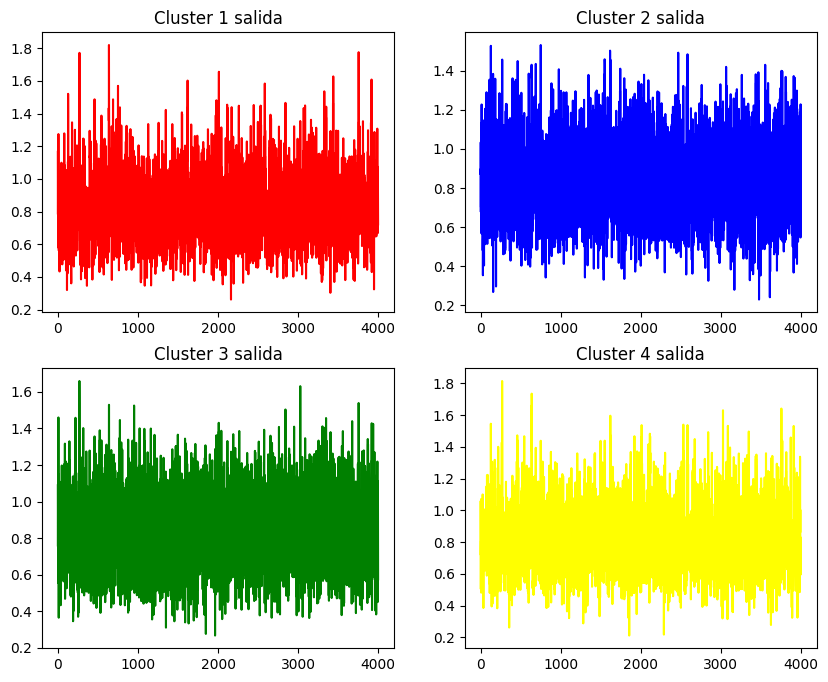

In [8]:
# Crear la figura y los subplots 2x2
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

axes[0,0].plot(output_signal[:,0],color = "red")
axes[0,0].set_title("Cluster 1 salida")

axes[0,1].plot(output_signal[:,1],color = "blue")
axes[0,1].set_title("Cluster 2 salida")

axes[1,0].plot(output_signal[:,2],color = "green")
axes[1,0].set_title("Cluster 3 salida")

axes[1,1].plot(output_signal[:,3],color = "yellow")
axes[1,1].set_title("Cluster 4 salida")

plt.show()

## Ejemplo con 1 solo canal(Póster).

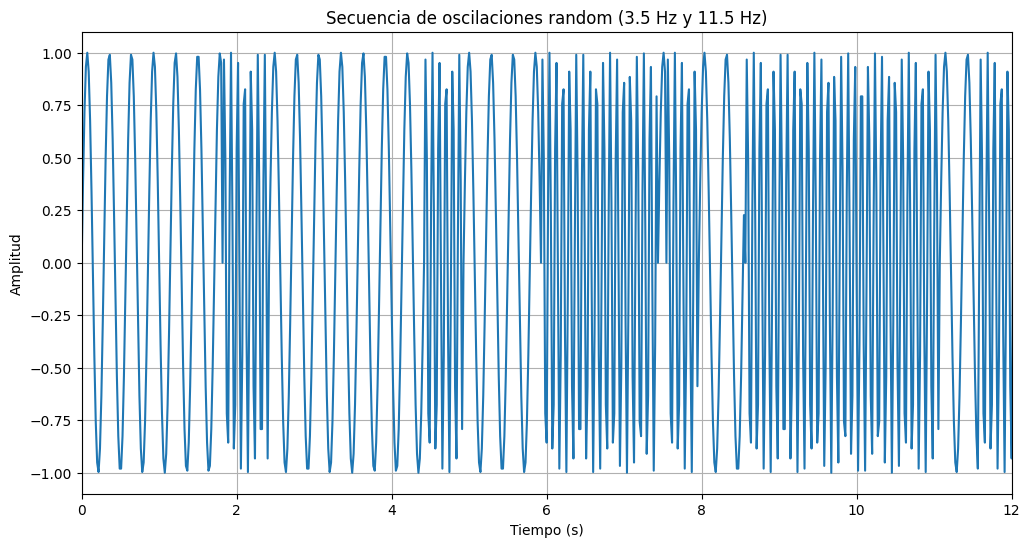

In [17]:
# Parámetros  
fs = 55            # Frecuencia de muestreo en Hz  
t_total = 12        # Duración total en segundos  
f1 = 3.5            # Frecuencia de la primera oscilación en Hz  
f2 = 11.5           # Frecuencia de la segunda oscilación en Hz  
duracion_segmento = [1.8, 0.6, 2, 0.5, 1, 1.5, 0.1, 0.4, 0.6, 2.5, 0.5, 0.5]  # Duración de cada segmento en segundos  
num_repeticiones = len(duracion_segmento) # Número total de segmentos

# Inicializamos la secuencia final como una lista  
secuencia = []  
amplitud = 1

# Llenar la secuencia con oscilaciones alternando  
for i in range(num_repeticiones):  
    # Calcular el tiempo para el segmento actual  
    tiempo_segmento = np.arange(0, duracion_segmento[i], 1/fs)  

    if i % 2 == 0:  # Índices pares para la primera oscilación  
        oscilacion = amplitud * np.sin(2 * np.pi * f1 * tiempo_segmento)  
    else:  # Índices impares para la segunda oscilación  
        oscilacion = amplitud * np.sin(2 * np.pi * f2 * tiempo_segmento)  

    secuencia.extend(oscilacion)  # Añadir el segmento a la secuencia  

# Convertir la lista de secuencia a un array de NumPy  
secuencia = np.array(secuencia)  

# Crear el tiempo correspondiente a la secuencia  
t = np.arange(0, len(secuencia)/fs , 1/fs) 
t = t[:-1]

# Graficar la señal  
plt.figure(figsize=(12, 6))  
plt.plot(t, secuencia)  
plt.title('Secuencia de oscilaciones random (3.5 Hz y 11.5 Hz)')  
plt.xlabel('Tiempo (s)')  
plt.ylabel('Amplitud')  
plt.xlim(0, t_total)  
plt.grid()  
plt.show()

In [18]:
# Parámetros
num_input_neurons = 1      # Dimensionalidad de entrada (1 canal)
num_reservoir_neurons = 3   # Número de neuronas en el reservorio
num_readout_neurons = 1      # Número de neuronas de salida

num_training_samples = t.shape[0] # Número de muestras de entrenamiento

# Generar pesos de entrada al reservorio
input2res = np.random.randn(num_reservoir_neurons, num_input_neurons)

# Generar pesos recurrentes del reservorio
res2res = np.random.randn(num_reservoir_neurons, num_reservoir_neurons)

# Normalizar las columnas de los pesos recurrentes
res2res = res2res / np.linalg.norm(res2res, axis=0)

# Sesgo del reservorio
input_bias = np.random.rand(num_reservoir_neurons, 1)

sec = secuencia.reshape(1, len(secuencia))

# Estados iniciales del reservorio
#reservoir_states = np.zeros((num_reservoir_neurons, num_training_samples + 1))
reservoir_states = np.random.randn(num_reservoir_neurons,num_training_samples + 1);

# Dinámicas del reservorio
for i in range(num_training_samples):
    reservoir_states[:, i + 1] = np.tanh(
        #(0.05 * input2res @ secuencia[i, np.newaxis]) +
        (0.05 * input2res @ sec[:, i]) +
        (0.95 * res2res @ reservoir_states[:, i]) +
        input_bias.flatten()
    )

# Extracción de la envolvente superior usando Hilbert transform
RS = reservoir_states - np.mean(reservoir_states,axis=1, keepdims=True)
analytic_signal = hilbert(RS)
amplitude_envelope = np.abs(analytic_signal)

print(analytic_signal.shape)
print(RS.shape)
print(amplitude_envelope.shape)

(3, 666)
(3, 666)
(3, 666)


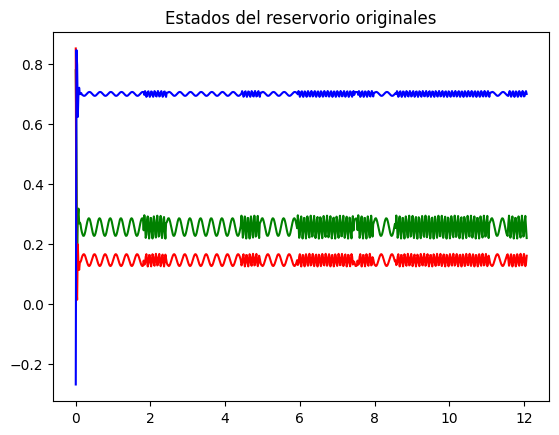

In [21]:
plt.plot(t, reservoir_states[0, 1:], color = 'green')
plt.plot(t, reservoir_states[1, 1:], color = 'red')
plt.plot(t, reservoir_states[2, 1:], color = 'blue')
plt.title("Estados del reservorio originales")
plt.show()

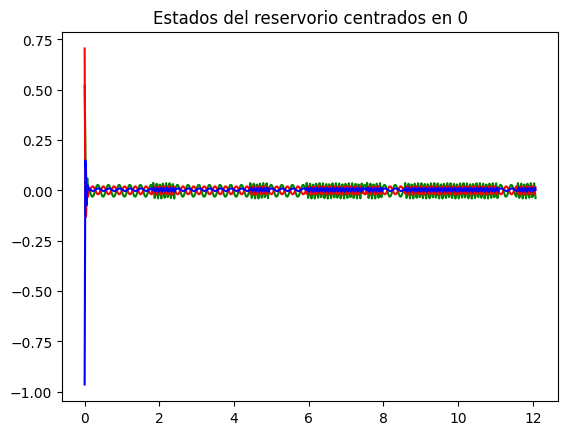

In [22]:
plt.plot(t, RS[0, 1:], color = 'green')
plt.plot(t, RS[1, 1:], color = 'red')
plt.plot(t, RS[2, 1:], color = 'blue')
plt.title("Estados del reservorio centrados en 0")
plt.show()

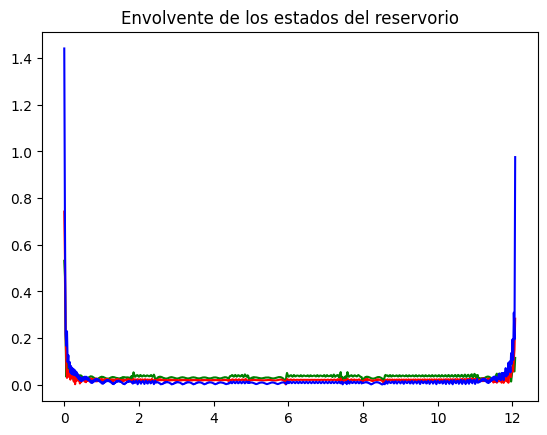

In [23]:
plt.plot(t, amplitude_envelope[0, 1:], color = 'green')
plt.plot(t, amplitude_envelope[1, 1:], color = 'red')
plt.plot(t, amplitude_envelope[2, 1:], color = 'blue')
plt.title("Envolvente de los estados del reservorio")
plt.show()

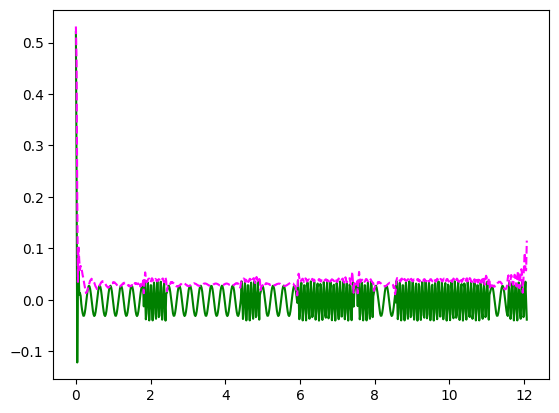

In [30]:
plt.plot(t, RS[0, 1:], color = 'green')
plt.plot(t, amplitude_envelope[0, 1:], linestyle="dashed", color = 'magenta')
plt.show()

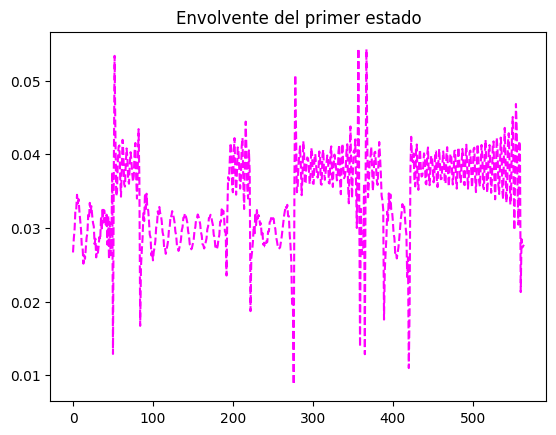

In [25]:
# Eliminamos los primeros 50 puntos para estabilizar el reservorio
stable_start = min(50, amplitude_envelope.shape[1])
input_sequence = amplitude_envelope[:, stable_start:-50]
plt.plot(input_sequence[0, 1:], linestyle="dashed", color = 'magenta')
plt.title("Envolvente del primer estado")
plt.show()

In [26]:
# Agrupamiento (clustering)
num_clusters = 2  # Número de clústeres
kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(input_sequence.T)

# Resultados
idx = kmeans.labels_  # Etiquetas de los clústeres
C = kmeans.cluster_centers_  # Centroides de los clústeres

print("Centroides de los clústeres:")
print(C)
print(idx.shape)

Centroides de los clústeres:
[[0.03847013 0.02106372 0.01063277]
 [0.02893382 0.01933877 0.00851355]]
(566,)


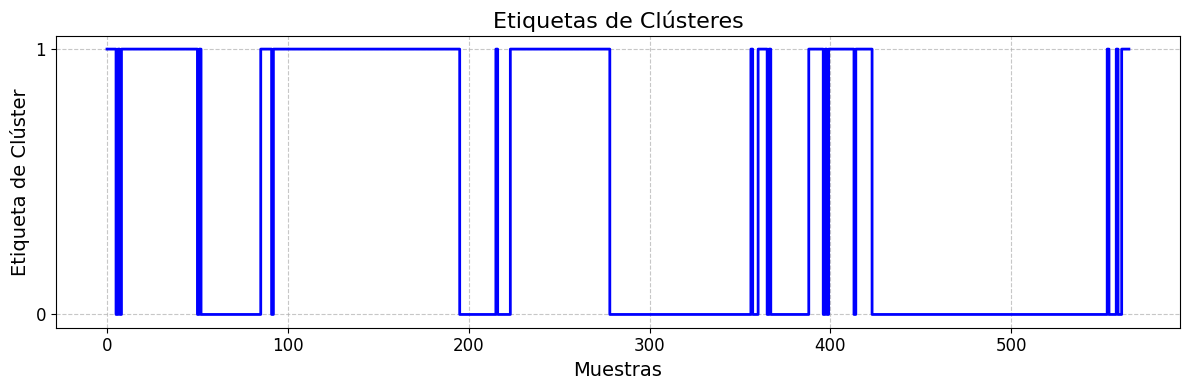

In [32]:
plt.figure(figsize=(12, 4))  
plt.step(range(input_sequence.shape[1]), idx, where='post', color='blue', linewidth=2) 
plt.title('Etiquetas de Clústeres', fontsize=16)
plt.xlabel('Muestras', fontsize=14)  
plt.ylabel('Etiqueta de Clúster', fontsize=14)  
plt.yticks(np.arange(num_clusters))  
plt.xticks(fontsize=12)  
plt.yticks(fontsize=12)  
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout() 
#plt.xlim(200,400)
plt.show()

Número de clústeres: 2, Coeficiente Silhouette: 0.4086
Número de clústeres: 3, Coeficiente Silhouette: 0.3394
Número de clústeres: 4, Coeficiente Silhouette: 0.3297
Número de clústeres: 5, Coeficiente Silhouette: 0.3447
Número de clústeres: 6, Coeficiente Silhouette: 0.3404
Número de clústeres: 7, Coeficiente Silhouette: 0.3546
Número de clústeres: 8, Coeficiente Silhouette: 0.3527


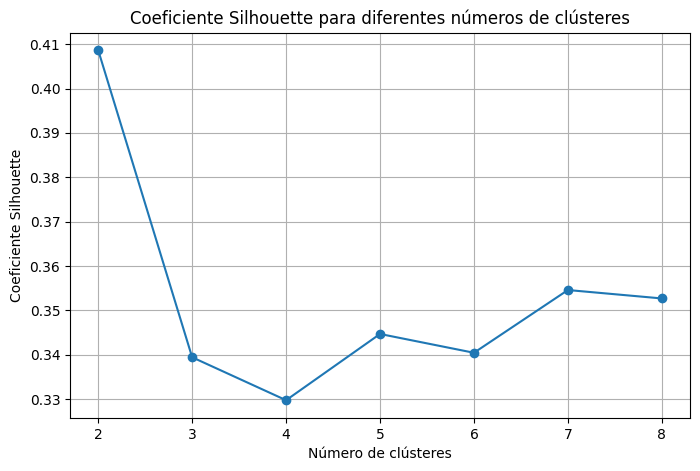

In [33]:
silhouette_scores = []  
clusters_range = range(2, 9)  # Clústeres de 2 a 8  
labels_clusters = []

for num_clusters in clusters_range:  
    kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(input_sequence.T)  
    labels = kmeans.labels_  
    labels_clusters.append(labels)
    silhouette_avg = silhouette_score(input_sequence.T, labels)  
    silhouette_scores.append(silhouette_avg)  
    print(f'Número de clústeres: {num_clusters}, Coeficiente Silhouette: {silhouette_avg:.4f}')  

# Graficar los resultados  
plt.figure(figsize=(8, 5))  
plt.plot(clusters_range, silhouette_scores, marker='o')  
plt.title('Coeficiente Silhouette para diferentes números de clústeres')  
plt.xlabel('Número de clústeres')  
plt.ylabel('Coeficiente Silhouette')  
plt.xticks(clusters_range)  
plt.grid()  
plt.show() 

## Reservoir con una señal sinusoidal simple.

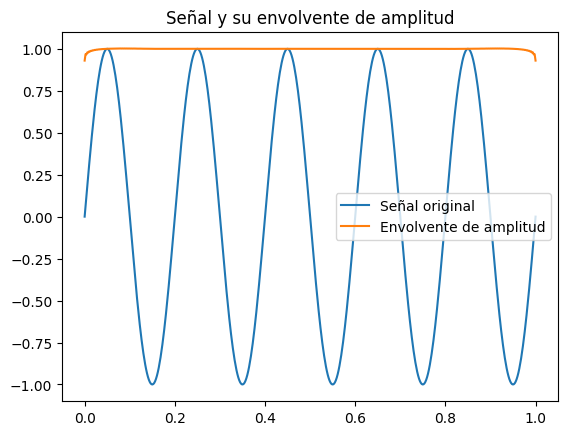

In [126]:
# Crear una señal de ejemplo
t = np.linspace(0, 1.0, 500)
signal = np.sin(2.0 * np.pi * 5.0 * t)

# Calcular la transformada de Hilbert
analytic_signal = hilbert(signal, axis = -1)
amplitude_envelope = np.abs(analytic_signal)

#Graficamos la envolvente.
plt.plot(t, signal, label='Señal original')
plt.plot(t, amplitude_envelope, label='Envolvente de amplitud')
plt.legend()
plt.title('Señal y su envolvente de amplitud')
plt.show()

In [59]:
signal.shape

(500,)

In [81]:
# Parámetros
num_input_neurons = 1      # Dimensionalidad de entrada (1 canal)
num_reservoir_neurons = 3   # Número de neuronas en el reservorio
num_readout_neurons = 1      # Número de neuronas de salida

num_training_samples = 500 # Número de muestras de entrenamiento

# Generar pesos de entrada al reservorio
input2res = np.random.randn(num_reservoir_neurons, num_input_neurons)

# Generar pesos recurrentes del reservorio
res2res = np.random.randn(num_reservoir_neurons, num_reservoir_neurons)

# Normalizar las columnas de los pesos recurrentes
res2res = res2res / np.linalg.norm(res2res, axis=0)

# Sesgo del reservorio
input_bias = np.random.rand(num_reservoir_neurons, 1)

# Estados iniciales del reservorio
reservoir_states = np.zeros((num_reservoir_neurons, num_training_samples + 1))

# Dinámicas del reservorio
for i in range(num_training_samples):
    reservoir_states[:, i + 1] = np.tanh(
        (0.05 * input2res @ signal[i, np.newaxis]) +
        (0.95 * res2res @ reservoir_states[:, i]) +
        input_bias.flatten()
    )
# Extracción de la envolvente superior usando Hilbert transform
analytic_signal = hilbert2(reservoir_states[:, 1:].T)
amplitude_envelope = np.abs(analytic_signal)

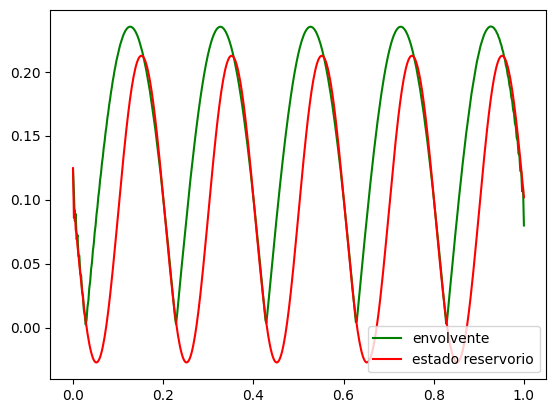

In [83]:
plt.plot(t, amplitude_envelope[:,1], color = 'green', label = 'envolvente')
plt.plot(t, reservoir_states.T[1:,1], color = 'red', label = 'estado reservorio')
plt.legend()
plt.show()